In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score


In [2]:
#Set Random seed
# np.random.seed(500)

# Add the Data using pandas
df = pd.read_csv(r"C:\Users\Acer\FYP_1.1_pro\audio\metadata_new\final_metadata\combined_csv_new_updated - Copy.csv",encoding='latin-1')



In [3]:
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


In [4]:
# try with CNN*** model

In [5]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
metadata=pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df = pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new_updated - Copy.csv')
df.head()

,name_of_audio,feature,lable
0,E2_P1.wav,[-3.6422656e+02 1.3304326e+02 -2.4707306e+01 ...,1
1,E3_P1.wav,[-3.7986017e+02 1.1947180e+02 -3.1631770e+00 ...,1
2,E2_P10.wav,[-3.5354391e+02 1.4500945e+02 -3.1722630e+01 ...,1
3,E2_P11.wav,[-3.5276407e+02 1.3659334e+02 -3.1263487e+01 ...,1
4,E1_P12.wav,[-4.27301239e+02 1.29095963e+02 -3.96940780e+...,1


In [7]:
# ipd.Audio('audio/rec/fold1/S1_P15_F.wav')
data, sampling_rate = librosa.load('audio/rec - Copy/S1_P1_F.wav')

In [8]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00143572,
       -0.00139209, -0.00141668], dtype=float32)

In [9]:
sampling_rate

22050

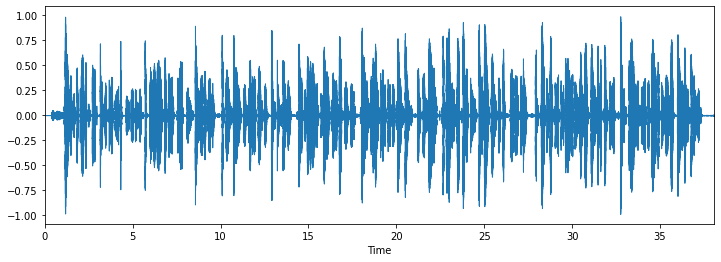

In [10]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

lable: 0


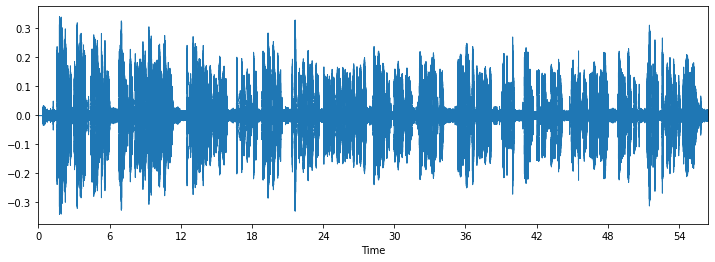

In [11]:
index = random.choice(df.index)

print('lable:', df['lable'][index])
data, sampling_rate = librosa.load('audio/rec - Copy/'+str(df['name_of_audio'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

<AxesSubplot:xlabel='lable', ylabel='count'>

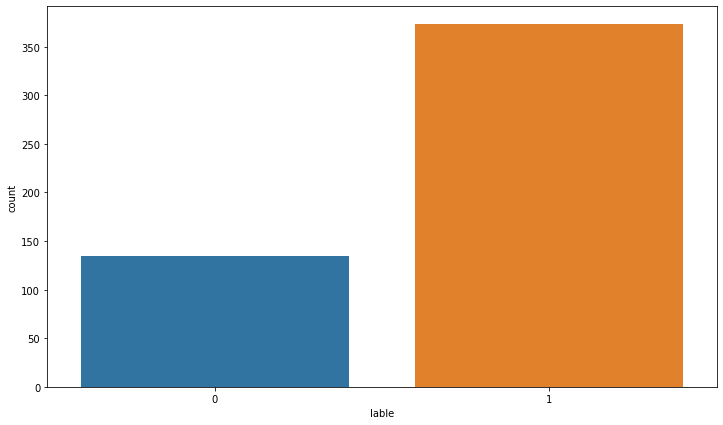

In [12]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['lable'])

In [13]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [14]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('audio/rec - Copy/', str(row.name_of_audio))
    final_class_labels=row["lable"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

508it [06:34,  1.29it/s]


In [15]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-364.22656, 133.04326, -24.707306, 8.948652, ...",1
1,"[-379.86017, 119.4718, -3.163177, 25.166592, -...",1
2,"[-353.5439, 145.00945, -31.72263, 8.87748, 17....",1
3,"[-352.76407, 136.59334, -31.263487, 8.083315, ...",1
4,"[-427.30124, 129.09596, -3.9694078, 8.760965, ...",1


In [16]:
extracted_features_df.to_csv('audio/metadata_new/final_metadata/extracted_features_df.csv')
print("done")

done


In [17]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [18]:
X.shape

(508, 40)

In [19]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [20]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
X_train

array([[-384.79132  ,  126.83416  ,   22.044748 , ...,    3.6588137,
           4.157282 ,    4.989248 ],
       [-332.5388   ,   92.562675 ,   -3.9492354, ...,    5.115012 ,
           4.4112234,    2.8012795],
       [-315.8667   ,  120.47542  ,   20.410995 , ...,   -2.1051085,
          -1.2823454,   -1.5356203],
       ...,
       [-392.28574  ,   88.3984   ,   -4.571233 , ...,   -1.4070433,
          -2.783642 ,   -1.0058346],
       [-393.10715  ,  157.4563   ,  -13.183333 , ...,    4.2225337,
           3.0959253,    2.988069 ],
       [-339.63928  ,  100.59851  ,   -1.3436158, ...,   -1.5343856,
          -0.6541061,   -2.4956307]], dtype=float32)

In [23]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [24]:
X_train.shape

(406, 40)

In [25]:
X_test.shape

(102, 40)

In [26]:
y_train.shape

(406, 2)

In [27]:
y_test.shape

(102, 2)

In [28]:
###### -------- Model Creation -------- ######

In [29]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [31]:
### No of classes
num_labels=y.shape[1]

In [32]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [43]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 600
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/600
 1/13 [=>............................] - ETA: 0s - loss: 0.3742 - accuracy: 0.7188
Epoch 00001: val_loss improved from inf to 0.48944, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 6ms/step - loss: 0.4597 - accuracy: 0.7315 - val_loss: 0.4894 - val_accuracy: 0.7157
Epoch 2/600
 1/13 [=>............................] - ETA: 0s - loss: 0.3414 - accuracy: 0.8125
Epoch 00002: val_loss improved from 0.48944 to 0.48195, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.7512 - val_loss: 0.4819 - val_accuracy: 0.7157
Epoch 3/600
 1/13 [=>............................] - ETA: 0s - loss: 0.4215 - accuracy: 0.8125
Epoch 00003: val_loss improved from 0.48195 to 0.47618, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.7857 - val_loss: 0.4762 - val_accuracy: 0.7255

In [44]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

82.35294222831726


In [45]:
X_test[1]

array([-3.3424139e+02,  1.1067206e+02, -6.6630416e+00,  4.1293573e+00,
       -1.1308483e+01, -1.0980946e+01, -1.5250362e+01,  1.9236928e+00,
       -1.4809805e+01,  2.3802032e-01, -7.7702599e+00,  3.6280439e+00,
       -5.6303148e+00, -6.6174512e+00, -7.5932426e+00, -5.3561540e+00,
       -2.5885587e+00, -5.4182224e+00, -5.7990346e+00, -5.9867935e+00,
       -1.1707730e+00, -2.6819625e+00, -3.1655645e-01,  2.5990316e-01,
       -9.8999280e-01,  5.7512655e+00, -1.5841848e+00,  4.2109928e-01,
        1.8964884e+00,  3.1722341e+00,  2.6149845e+00,  5.7462988e+00,
        2.8583210e+00,  1.4889371e+00,  3.4892721e+00, -8.1730686e-02,
       -3.9798820e-01,  8.0889344e-01, -1.4317317e+00, -6.2499964e-01],
      dtype=float32)

In [46]:
model.predict_classes(X_test)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [47]:
# Testing Some Test Audio Data

In [59]:
filename="audio/test/S15_P11_F.wav"
# S53_P16_F.wav
# S15_P12_F
# S47_P5_M
# S66_P13_F
# S80_P9_F
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.7407809e+02  9.4333420e+01 -1.8600550e+01  3.6770454e+01
 -8.4028921e+00 -1.6089230e+01 -1.5080973e+01 -2.5797531e+01
 -8.6793633e+00 -1.1694519e+01 -1.3656996e+01 -1.4920211e+01
 -1.0464228e+01 -6.5972204e+00 -8.0304260e+00 -5.9242659e+00
 -3.3941271e+00 -2.4859211e+00 -8.9847240e+00 -4.2518182e+00
 -2.0214176e+00 -5.9973407e+00  3.7480056e-01 -2.4540784e+00
 -4.6795554e+00 -1.7582238e+00 -4.5259929e+00 -2.8423886e+00
 -6.7155737e-01  1.0814966e-01  2.2921562e+00  2.6345947e+00
  2.1705348e+00 -5.2751881e-01 -6.9644945e-03  1.1093524e+00
 -3.1303546e+00 -2.4162803e+00 -5.6212240e-01 -2.0515184e+00]
[[-3.7407809e+02  9.4333420e+01 -1.8600550e+01  3.6770454e+01
  -8.4028921e+00 -1.6089230e+01 -1.5080973e+01 -2.5797531e+01
  -8.6793633e+00 -1.1694519e+01 -1.3656996e+01 -1.4920211e+01
  -1.0464228e+01 -6.5972204e+00 -8.0304260e+00 -5.9242659e+00
  -3.3941271e+00 -2.4859211e+00 -8.9847240e+00 -4.2518182e+00
  -2.0214176e+00 -5.9973407e+00  3.7480056e-01 -2.4540784e+00
  -4.6795554e+00 

array([0])

In [60]:
print(prediction_class)

[0]


In [81]:
# if (prediction_class == 1):
#     print("Well Done.You have pronunced words correctly.")
# else:
#     print("Your pronunciation need to be improve")

Your pronunciation need to be improve


In [61]:
# !pip install SpeechRecognition

In [62]:
# !pip install pydub

In [63]:
# Testing with some text data to give feedback

In [64]:
# importing libraries
import speech_recognition as sr
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [73]:
import speech_recognition as sr

if (prediction_class == 1):
    print("Well Done.You have pronunced words correctly.")
else:

    r = sr.Recognizer()

    with sr.AudioFile(filename) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print('working on...')
            print(text)
        except:
            print('Sorry...run again...')

working on...
new serials transition from FTP to mmp demonstrate the benefits and drawbacks of each system in the 1970 Newzealand Grove disillusioned with the two-party system if PP did not provide water with another viable option however the late in third party received a considerable 16% of the word in 1978 but again only one of the two seats in Parliament three years later they would she was up to 21% but they gain only to seeds a royal Commission subsequent to recommended the shift to m m p and in 1993 straight right refund amount was held that was in favour of the reform


In [85]:

import re


txt = text

#Check if "ain" is present at the end of a WORD:

# re.findall(r"\band\b|\bor\b|\bnot\b", "These are oranges and apples and pears, but not pinapples or ..")

# torsional mode of vibration is a consequence of
set1 = re.findall(r"\bbowling\b|\bball\b|\browing\b|\brow\b|\bhall\b|\bholes\b", txt)
set2 = re.findall(r"\btelephone\b|\bphones\b", txt)
set3 = re.findall(r"\bfruit\b|\bfly\b|\bfraction\b|\bfan\b", txt)
set4 = re.findall(r"\bpool\b|\bpenalties\b|\btransportation\b|\btransported\b", txt)
set5 = re.findall(r"\bseat\b|\bseats\b|\bcent\b", txt)
set6 = re.findall(r"\bzones\b|\blizard\b|\bzoo\b", txt)
set7 = re.findall(r"\bwaist\b|\bvibration\b|\bwind\b|\bweight\b", txt)

# print(x)


if set1:
  print("Error: Confusing /o/ and /ɔ /..Have pronunciation errors when speaking bowling, rowers, hall like words.")
if set2:
  print("Error: Overuse of /ɔ / rather than /o/..Have pronunciation errors when speaking phone, yoghut like words.")
if set3:
  print("Error: Confusing /p/ and /f/..Have pronunciation errors when speaking fan, pan, profit like words.")
if set4:
  print("Error: Overuse of /f /..Have pronunciation errors when speaking Airport, pool like words.")
if set5:
  print("Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like words.")
if set6:
  print("Error: Use of [s] in place of [z]..Have pronunciation errors when speaking zoo, zip like words.")
if set7:
  print("Error: Use of [wr] and [ar]..Have pronunciation errors when speaking winter, win, west, vest, vantage like words.")





Error: Use of [ʃ] in place of [s]..Have pronunciation errors when speaking cell, sell, seat like words.
